In [8]:
# Global imports and settings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

pd.set_option('display.max_columns', 99999)

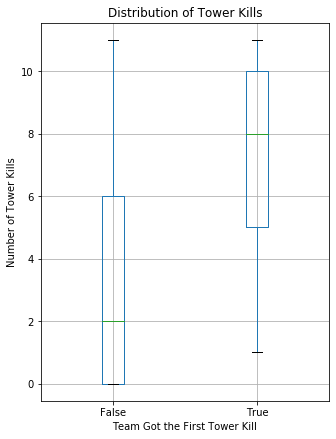

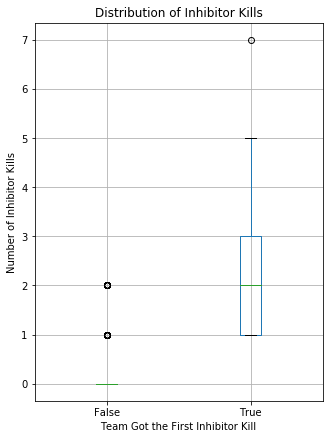

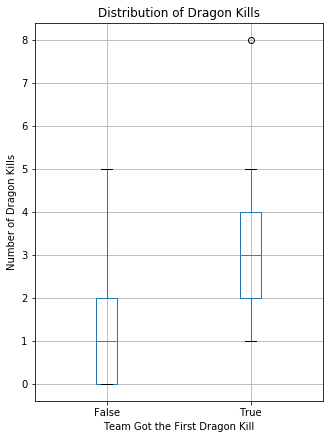

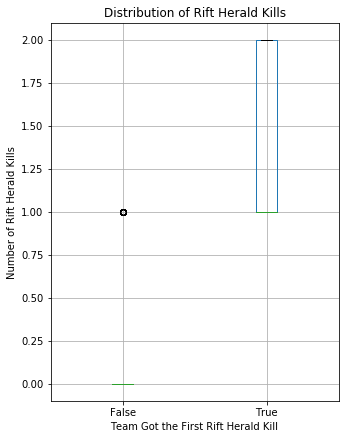

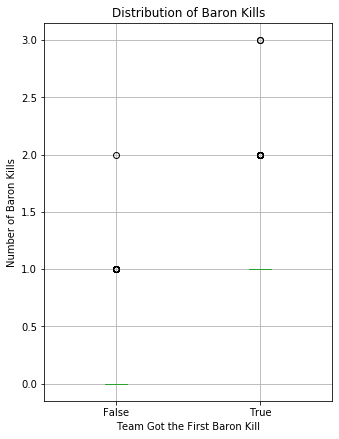

In [9]:
# Read in data
csv_file = '..\Data Generation\Refactored\match_data.csv'
df = pd.read_csv(csv_file)


def format_name(column_name: str) -> str:
    """Returns a formatted string of a column to be used in graphs.
    
    Args:
        column_name: An unformatted string that is partially the name of a column
    
    Returns:
        A formatted string to be used in graph, such as the main title or axes titles
    """
    if column_name != 'rift_herald':
        return column_name.capitalize()
    else:
        return 'Rift Herald'


def get_kill_column(column_name: str) -> list:
    """Returns the column that contains the quantitative data.
    
    Args:
        column_name: A string requesting one of five column types
        
    Returns:
        A list with a single string, which is the name of correct column
    """
    pairings = {'tower': 'tower_kills', 'inhibitor': 'inhibitor_kills', 'dragon': 'dragon_kills',
                'rift_herald': 'rift_herald_kills', 'baron': 'baron_kills'}
    return [pairings[column_name]]


column_names = ['tower', 'inhibitor', 'dragon', 'rift_herald', 'baron']
for column in column_names:
    box_plot = df.boxplot(column=get_kill_column(column), by=f'first_{column}')
    column = format_name(column)
    
    # Set correct graph size and titles
    plt.gcf().set_size_inches(5, 7)
    plt.suptitle('')  # Suppress autogenerated titles by matplotlib
    plt.xlabel(f'Team Got the First {column} Kill')
    plt.ylabel(f'Number of {column} Kills')
    plt.title(f'Distribution of {column} Kills')
    plt.show()